In [1]:
!kaggle datasets download -d nelgiriyewithana/credit-card-fraud-detection-dataset-2023

 99%|███████████████████████████████████████▍| 141M/143M [00:06<00:00, 18.5MB/s]
100%|████████████████████████████████████████| 143M/143M [00:06<00:00, 21.9MB/s]


In [4]:
!unzip credit-card-fraud-detection-dataset-2023.zip

Archive:  credit-card-fraud-detection-dataset-2023.zip
  inflating: creditcard_2023.csv     


In [5]:
!rm -rf credit-card-fraud-detection-dataset-2023.zip
!mv creditcard_2023.csv ../../data/creditcard_2023.csv

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <Ax

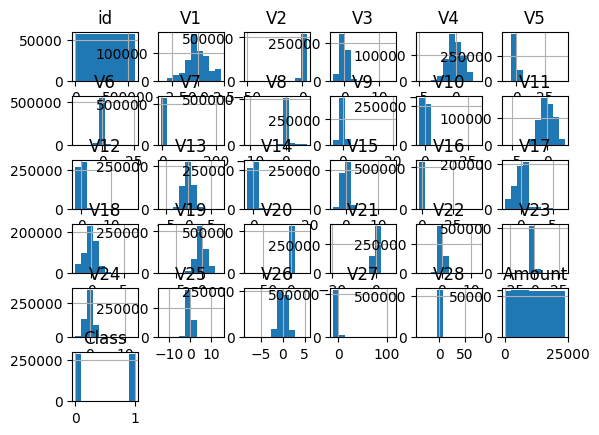

In [15]:
data = pd.read_csv('../../data/creditcard_2023.csv')
print(data.columns)
data.hist()

In [16]:
X = data.drop(columns=['id'])
y = data['Class']

X.describe()

from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC

# this takes a lot longer
# X, y = SMOTENC(categorical_features=[3,4,5,6]).fit_resample(X, y)
X, y = ADASYN().fit_resample(X, y)
# y.hist()

# Models

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_preds = logit_model.predict(X_test)

for pred, actual in zip(y_test[:20], y_preds[:20]):
    print(f'{actual} : {pred}')

1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
0 : 0
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1


/Users/braydenchristensen/opt/anaconda3/envs/fraud-detection/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print(f'Accuracy: {logit_model.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'F1 score: {f1_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_preds)}')

Accuracy: 0.9933260644004009
Precision: 0.9948745853153359
F1 score: 0.9933489313599201
Recall: 0.9918279494627795
Confusion Matrix: 
[[56288   292]
 [  467 56679]]


In [20]:
# now I want to see the regression coefficients
dict(zip(logit_model.coef_.flatten(), X.columns))

{-1.5343191637057643: 'V1',
 -0.06857111588651577: 'V2',
 -0.9768105218276557: 'V3',
 3.5533305227830274: 'V4',
 0.21061073370722805: 'V5',
 -0.09090786760727097: 'V6',
 -0.04682542863621714: 'V7',
 -0.606463205719157: 'V8',
 -0.7724489924742732: 'V9',
 -0.6395744838384084: 'V10',
 1.254311198380906: 'V11',
 -2.1968600328571832: 'V12',
 0.21966532048436102: 'V13',
 -2.120184698865491: 'V14',
 -0.1366522233169238: 'V15',
 -0.8609826158210367: 'V16',
 -0.030900208323860184: 'V17',
 -0.6438770277022468: 'V18',
 0.06059849426210146: 'V19',
 0.10500287232296272: 'V20',
 0.21605539750283817: 'V21',
 0.6869214005649728: 'V22',
 0.14684182776271648: 'V23',
 0.6261833064468939: 'V24',
 -0.30696606968981477: 'V25',
 0.1677269117964194: 'V26',
 0.14075997747349922: 'V27',
 0.2622398721282403: 'V28',
 1.957337250524882e-05: 'Amount',
 7.130676029411334: 'Class'}

### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_preds = decision_tree_model.predict(X_test)

for pred, actual in zip(y_test[:20], y_preds[:20]):
    print(f'{actual} : {pred}')

1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
0 : 0
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1


In [22]:
print(f'Accuracy: {decision_tree_model.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'F1 score: {f1_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_preds)}')

Accuracy: 1.0
Precision: 1.0
F1 score: 1.0
Recall: 1.0
Confusion Matrix: 
[[56580     0]
 [    0 57146]]


### XGBoost

In [24]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_preds = xgb_model.predict(X_test)

In [25]:
print(f'Accuracy: {xgb_model.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'F1 score: {f1_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_preds)}')

Accuracy: 1.0
Precision: 1.0
F1 score: 1.0
Recall: 1.0
Confusion Matrix: 
[[56580     0]
 [    0 57146]]


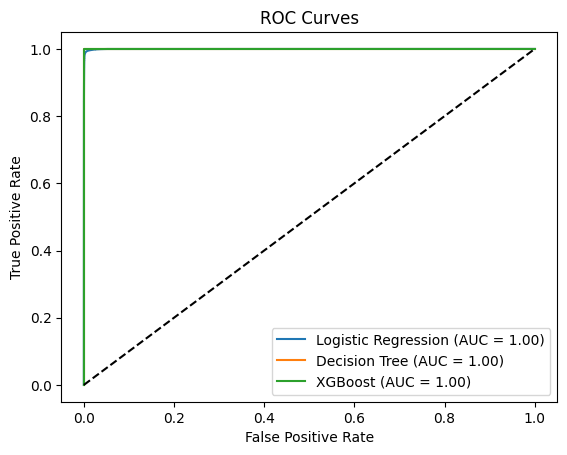

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for each model
logit_probs = logit_model.predict_proba(X_test)[:, 1]
dt_probs = decision_tree_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for each model
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

# Compute the AUC score for each model
logit_auc = roc_auc_score(y_test, logit_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

# Plot the ROC curves
plt.plot(logit_fpr, logit_tpr, label=f'Logistic Regression (AUC = {logit_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Set the labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()

# Show the plot
plt.show()